In [ ]:
pip install --upgrade pip

Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
pip install dash

In [ ]:
!pip3 install folium==0.5.0
import folium

In [ ]:
import plotly.express as px
from pyspark.sql.functions import *


In [ ]:
from pyspark.sql import SparkSession

#Initialize SparkSession 
spark = SparkSession.builder.getOrCreate()

file_path = "/FileStore/tables/extracted_data.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

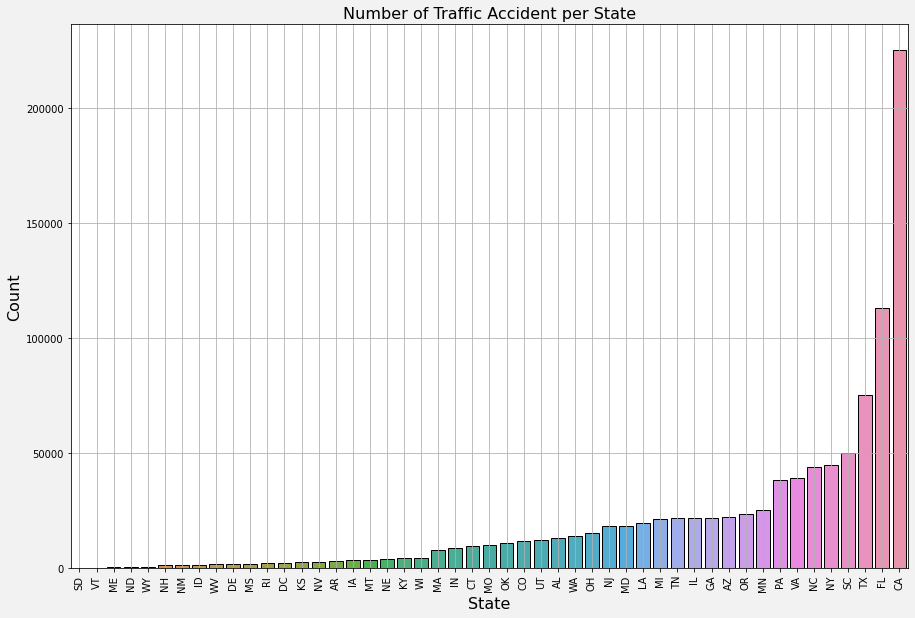

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
state_counts = df.groupBy('State').agg(count('*').alias('count')).orderBy('count')

# Convert the spark df to a pandas df for plotting
state_counts_pd = state_counts.toPandas()

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a bar plot with random colors and borders
sns.barplot(x=state_counts_pd['State'], y=state_counts_pd['count'], edgecolor='black')

# Set the background color
plt.gcf().set_facecolor('#f2f2f2')  # Set the background color to a light gray

plt.xlabel('State', fontsize=16)
plt.grid(True)
plt.xticks(rotation=90)
plt.ylabel('Count', fontsize=16)
plt.title('Number of Traffic Accident per State', fontsize=16)

plt.show()

# The graph shows California state has the most number of accidents which is reasonable as it has the highest population in the U.S.

In [ ]:
df_map = df.select('Start_Lat', 'Start_Lng', 'State')
df_map

Out[8]: DataFrame[Start_Lat: double, Start_Lng: double, State: string]

In [ ]:
from folium import plugins

#function to superimpose the locations of accidents on the city map
def hot_spot_area(city_name, state_name, latitude, longitude):
    df_city = df.filter((df['City'] == city_name) & (df['State'] == state_name))
    df_city = df_city.select('Start_Lat', 'Start_Lng')
    print(f"Number of accidents in {city_name}, {state_name}: ", df_city.count())
    #convert to pandas dataframe
    df_city = df_city.toPandas() 
    
    # create a map of the city
    city_map = folium.Map(location = [latitude, longitude], zoom_start = 12)
    
    # instantiate a mark cluster object for the accidents
    accidents = plugins.MarkerCluster().add_to(city_map)
    
    # loop through the dataframe and add each data point to the mark cluster
    for lat, lng, in zip(df_city.Start_Lat, df_city.Start_Lng):
            folium.Marker(
                location=[lat, lng],
                icon=None,
            ).add_to(accidents)
        
    # return the city map
    return city_map

In [ ]:
# San Francisco latitude and longitude values
san_latitude = 37.77
san_longitude = -122.42

# display the places where accidents occured in SF. 
hot_spot_area('San Francisco', 'CA', san_latitude, san_longitude)

Number of accidents in San Francisco, CA:  2210


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 <script>L_PREFER_CANVAS = false; L_NO_TOUCH = false; L_DISABLE_3D = false;</script>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.2.0/dist/leaflet.js"></script>
 <script src="https://ajax.googleapis.com/ajax/libs/jquery/1.11.1/jquery.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.2.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://rawgit.com/python-visualization/folium/master/folium/templates/leaflet.awesome.rotate.css"/>
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 
 <style> #map_1e7f05b70dd957c9e7464a0f0d722f87 {
 position : relative;
 width : 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
 <script src="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/leaflet.markercluster.js"></script>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/leaflet.markercluster/1.1.0/MarkerCluster.Default.css"/>
</head>
<body>
 
 
 <div class="folium-map" id="map_1e7f05b70dd957c9e7464a0f0d722f87" ></div>
 
</body>
<script>
 
 

 
 var bounds = null;
 

 var map_1e7f05b70dd957c9e7464a0f0d722f87 = L.map(
 'map_1e7f05b70dd957c9e7464a0f0d722f87',
 {center: [37.77,-122.42],
 zoom: 12,
 maxBounds: bounds,
 layers: [],
 worldCopyJump: false,
 crs: L.CRS.EPSG3857
 });
 
 
 
 var tile_layer_5929b8e0c1697bfb4749d36e0bce138d = L.tileLayer(
 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
 {
 "attribution": null,
 "detectRetina": false,
 "maxZoom": 18,
 "minZoom": 1,
 "noWrap": false,
 "subdomains": "abc"
}
 ).addTo(map_1e7f05b70dd957c9e7464a0f0d722f87);
 
 
 var marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2 = L.markerClusterGroup({
 
 });
 map_1e7f05b70dd957c9e7464a0f0d722f87.addLayer(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_28e4762663678e85997d2c789362bf6e = L.marker(
 [37.753136,-122.402802],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_d641055cb0565f76259accd2eb728cd2 = L.marker(
 [37.809587,-122.365697],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_a4094a0b44489d09ae2648e65bf2c95b = L.marker(
 [37.768874,-122.406924],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_aa23e6692550143b15cecf5ee8a462e6 = L.marker(
 [37.765236,-122.404898],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_26c34e6c98ed50ec25602beabbf3146b = L.marker(
 [37.753468,-122.40286100000002],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_f195630e961b0d14f2db95c1640da453 = L.marker(
 [37.7707278726684,-122.40596651972577],
 {
 icon: new L.Icon.Default()
 }
 )
 .addTo(marker_cluster_96e80aac3f012ddb1b6b68a4ee64a5c2);
 
 

 var marker_deda5edeaa1dd8530010a50f88149fee = L.mar

In [ ]:
#Los Angeles example
la_latitude = 34.052235
la_longitude = -118.243683

#display accident hot spots in Los Angeles on the map
#hot_spot_area('Los Angeles', 'CA', la_latitude, la_longitude)

In [ ]:
#Miami example
ma_latitude = 25.761681
ma_longitude = -80.191788

#display accident hot spots in Miami on the map
# hot_spot_area('Miami', 'FL', ma_latitude, ma_longitude)

In [ ]:
#to check how many rows and columns the dataset contains
num_rows = df.count()
print(f"The data frame contains {num_rows} number of rows.")
num_cols = len(df.columns)
print(f"The data frame contains {num_cols} number of columns.")


The data frame contains 1000000 number of rows.
The data frame contains 46 number of columns.


In [ ]:
# check null values to clean the data
null_counts = [(column, df.filter(col(column).isNull()).count()) for column in df.columns]
for column, count in null_counts:
	print(f"Number of null values in {column}: {count}")

Number of null values in ID: 0
Number of null values in Source: 0
Number of null values in Severity: 0
Number of null values in Start_Time: 0
Number of null values in End_Time: 0
Number of null values in Start_Lat: 0
Number of null values in Start_Lng: 0
Number of null values in End_Lat: 440642
Number of null values in End_Lng: 440642
Number of null values in Distance(mi): 0
Number of null values in Description: 1
Number of null values in Street: 1407
Number of null values in City: 36
Number of null values in County: 0
Number of null values in State: 0
Number of null values in Zipcode: 245
Number of null values in Country: 0
Number of null values in Timezone: 993
Number of null values in Airport_Code: 2901
Number of null values in Weather_Timestamp: 15578
Number of null values in Temperature(F): 21189
Number of null values in Wind_Chill(F): 258915
Number of null values in Humidity(%): 22487
Number of null values in Pressure(in): 18220
Number of null values in Visibility(mi): 22925
Numb

In [ ]:
# preprocessing
selected_df = df.select('Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'City', 'County', 'State', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset')

#exclude columns having many nulls from the beginning

In [ ]:

# Extract time features from Start_Time
transformed_df = selected_df.withColumn("hour", hour("Start_Time")).withColumn("day_of_week", dayofweek("Start_Time")).withColumn("month", month("Start_Time")).withColumn("year", year("Start_Time")).withColumn("day_of_month", dayofmonth("Start_Time"))


In [ ]:
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
boolean_counts=[]
for column_name in boolean_columns:
	counts = df.groupBy(column_name).count().collect()
	boolean_counts.append((column_name, counts))

#display the results
for column_name, counts in boolean_counts:
	print(f"Column {column_name}:")
	for row in counts:
		value = row[column_name]
		count = row["count"]
		print(f" {value}: {count} occurrences")
	print()
 
 #Bump, Give_Way, No_Exit, Roundabout, Traffic_Calming, Turning_Loop will be excluded because they have aboe 90% concentrated on one value

Column Amenity:
 True: 12330 occurrences
 False: 987670 occurrences

Column Bump:
 True: 475 occurrences
 False: 999525 occurrences

Column Crossing:
 True: 112449 occurrences
 False: 887551 occurrences

Column Give_Way:
 True: 4761 occurrences
 False: 995239 occurrences

Column Junction:
 True: 73669 occurrences
 False: 926331 occurrences

Column No_Exit:
 True: 2549 occurrences
 False: 997451 occurrences

Column Railway:
 True: 8631 occurrences
 False: 991369 occurrences

Column Roundabout:
 True: 34 occurrences
 False: 999966 occurrences

Column Station:
 True: 25846 occurrences
 False: 974154 occurrences

Column Stop:
 True: 27489 occurrences
 False: 972511 occurrences

Column Traffic_Calming:
 True: 964 occurrences
 False: 999036 occurrences

Column Traffic_Signal:
 True: 147680 occurrences
 False: 852320 occurrences

Column Turning_Loop:
 False: 1000000 occurrences



In [ ]:
transfomed_df = transformed_df.drop('Bump').drop('Give_Way').drop('No_Exit').drop('Roundabout').drop('Traffic_Calming').drop('Turning_Loop').drop('County')

In [ ]:
import matplotlib.pyplot as plt

# Group by month to count the number of accident for each month
num_accidents_per_month = transformed_df.groupBy('month', 'year').count().orderBy("month")
# convert df to pandas to visualize the results
num_accidents_per_month_pd = num_accidents_per_month.toPandas()


In [ ]:
# Group by month to count the number of accident for each month
num_accidents_per_month = transformed_df.groupBy('month', 'year').count().orderBy("month")
# convert df to pandas to visualize the results
num_accidents_per_month_pd = num_accidents_per_month.toPandas()

num_accidents_per_month_pd = num_accidents_per_month_pd.sort_values(['month', 'year'])

fig = px.bar(num_accidents_per_month_pd, x="month", y="count", color="year", title="Monthly Accident Count Over Time", facet_col="year", facet_col_wrap=2,
             category_orders={"year": [2016, 2017, 2018, 2019, 2020, 2021, 2022]}, height=1200, text="count")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

# the monthly number of accidents are pretty different each year. So there are no significant monthly trends/patterns that can be found across different years.

In [ ]:
# Extract the date from the timestamp in 'Start_Time' column and create a new column for the accident date
# we exclue year of 2023 as it contains only the first three month of that year (January through March) which does not give the full information of that year
transformed_df = transformed_df.filter(col('year') < 2023)

# Group by hour to count the number of accident for every hour
hourDf = transformed_df.groupBy(['hour', 'year']).count().orderBy('hour')

hour_pandas = hourDf.toPandas()

# Sort DataFrame based on the hour and year
hour_pandas = hour_pandas.sort_values(['hour', 'year'])

fig = px.bar(hour_pandas, x="hour", y="count", color="year", title="Number of Traffic Accident per Hour of Day", category_orders={"year": sorted(hour_pandas['year'].unique())})
fig.show()

#The graph shows the traffic accidents occur the most in 7-8 a.m. and 4-5 p.m., which are typical rush hour time during the day

In [ ]:

import pandas as pd

# Extract the date from the timestamp in 'Start_Time' column and create a new column for the accident date
transformed_df = transformed_df.filter(col('year') < 2023)
dayOfWeek = transformed_df.withColumn("Day", (date_format(transformed_df.Start_Time, "EEEE")))

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Day to count the number of accident for each day
num_accidents_per_day = dayOfWeek.groupBy(['Day', 'year']).count().orderBy('Day')

# convert df to pandas to visualize the results
num_accidents_per_day_pd = num_accidents_per_day.toPandas()

# Use Categorical data type to set custom order
num_accidents_per_day_pd['Day'] = pd.Categorical(num_accidents_per_day_pd['Day'], categories=day_order, ordered=True)

# Sort DataFrame based on the typical order of a week
num_accidents_per_day_pd = num_accidents_per_day_pd.sort_values(['Day', 'year'])

fig = px.bar(num_accidents_per_day_pd, x="Day", y="count", color="year", title="Daily Accident Count in a Week", text_auto=True, height=800)
fig.update_xaxes(title_text='Day of Week')
fig.update_yaxes(title_text='Number of Accidents')

fig.show()

# this graph also distinguish different years to ensure checking there is no exceptional year that affect the results of the total weekdays and weekends. 
# it shows the accidents are mostly happening during weekdays than weekends.

In [ ]:
# Group by day_of_month to count the number of accident for the day of month (i.e., 1 - 31)
count_day = transformed_df.groupBy('day_of_month', 'month').count().orderBy("day_of_month")
# convert df to pandas to visualize the results
count_day_pd = count_day.toPandas()

# Sort DataFrame based on the typical order of a week
count_day_pd = count_day_pd.sort_values(['day_of_month', 'month'])

fig = px.bar(count_day_pd, x="day_of_month", y="count", color="month", title="Number of Accident per Day of Month (1-31)")
fig.update_xaxes(title_text='Day of Month')
fig.update_yaxes(title_text='Number of Accidents')

fig.show()

# it shows there are no distinct pattern/difference between different days of a month. So we will not use this feature further.

In [ ]:

# Group by month to count the number of accident for each month
num_accidents_per_month = transformed_df.groupBy('month', 'year').count().orderBy("month")
# convert df to pandas to visualize the results
num_accidents_per_month_pd = num_accidents_per_month.toPandas()

# Sort DataFrame based on the typical order of a month
count_month_pd = num_accidents_per_month_pd.sort_values(['month', 'year'])

#plot the graph for the number of accidents per month
fig = px.bar(count_month_pd, x="month", y="count", color="year", title="Monthly Accident Count Over Time", text_auto=True, height=800)
fig.update_xaxes(title_text='Month of Year')
fig.update_yaxes(title_text='Number of Accidents')

fig.show()

# the graph shows October, November, and December have the highest number of accidents, but the rest are pretty similar